# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [22]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL

# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Append the City information into city_data list
        city_data.append({"City": city_weather['name'], 
                          "Lat": city_weather['coord']['lat'], 
                          "Lng": city_weather['coord']['lon'], 
                          "Max Temp": city_weather['main']['temp_max'],
                          "Humidity": city_weather['main']['humidity'],
                          "Cloudiness": city_weather['clouds']['all'],
                          "Wind Speed": city_weather['wind']['speed'],
                          "Country": city_weather['sys']['country'],
                          "Date": city_weather['dt']})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cap-chat
Processing Record 2 of Set 1 | hualmay
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | utmanzai
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | rawson
Processing Record 7 of Set 1 | palmer
Processing Record 8 of Set 1 | kushima
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | comodoro rivadavia
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | tezu
Processing Record 13 of Set 1 | tagusao
Processing Record 14 of Set 1 | hopelchen
Processing Record 15 of Set 1 | san rafael
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | saint anthony
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | ta khmau
Processing Record 21 of Set 1 | santiago
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cap-Chat,49.1001,-66.6821,-3.00,93,100,2.06,CA,1680569828
1,Hualmay,-11.0964,-77.6139,25.19,79,95,4.60,PE,1680570083
2,Mataura,-46.1927,168.8643,14.71,51,43,2.07,NZ,1680570091
3,Utmanzai,34.1880,71.7629,14.34,91,15,1.46,PK,1680570093
4,Puerto Ayora,-0.7393,-90.3518,27.53,91,21,1.34,EC,1680569983


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Cap-Chat,49.1001,-66.6821,-3.00,93,100,2.06,CA,1680569828
1,Hualmay,-11.0964,-77.6139,25.19,79,95,4.60,PE,1680570083
2,Mataura,-46.1927,168.8643,14.71,51,43,2.07,NZ,1680570091
3,Utmanzai,34.1880,71.7629,14.34,91,15,1.46,PK,1680570093
4,Puerto Ayora,-0.7393,-90.3518,27.53,91,21,1.34,EC,1680569983


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

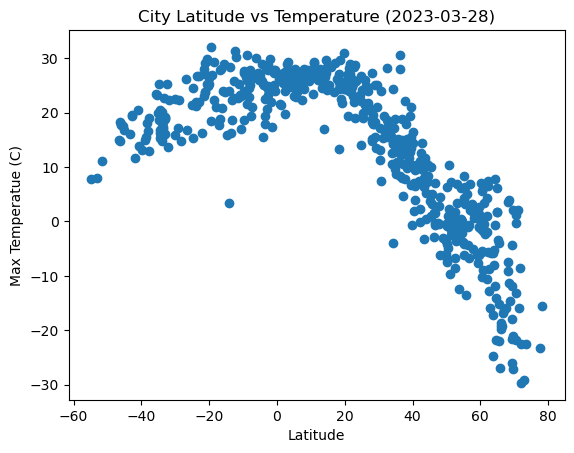

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker ="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperatue (C)")
plt.title("City Latitude vs Temperature (2023-03-28)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

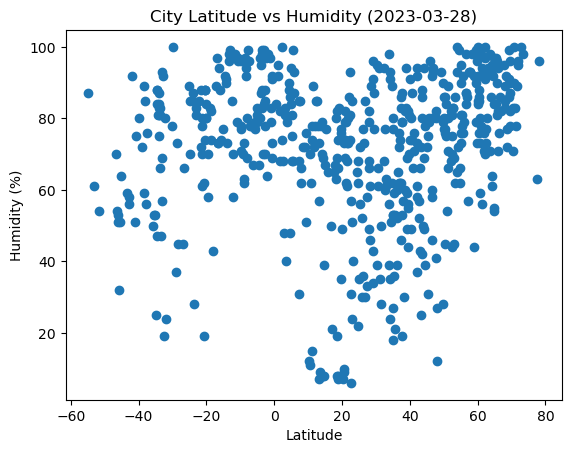

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker ="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2023-03-28)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

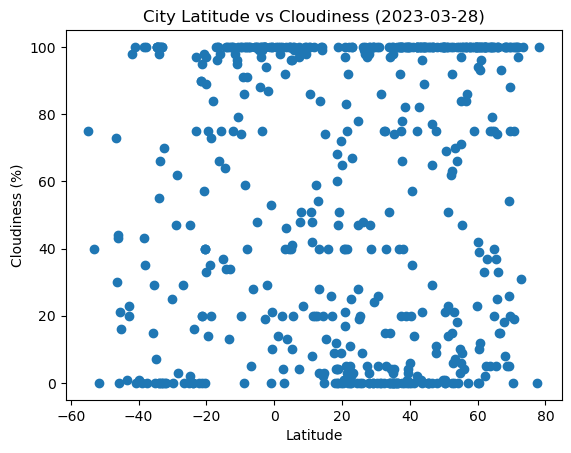

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker ="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2023-03-28)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

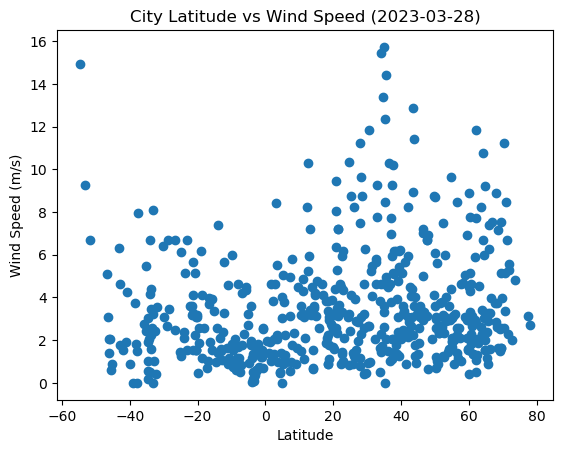

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker ="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2023-03-28)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def lin_regression(x,y,title):
    plt.scatter(x,y)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    (slope,intercept,rvalue,pvalue,stderr) = stats.linregress(x,y)
    regress_values = x*slope + intercept
    line_eq =  "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.plot(x,regress_values,"r")
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0),["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Cap-Chat,49.1001,-66.6821,-3.00,93,100,2.06,CA,1680569828
3,Utmanzai,34.1880,71.7629,14.34,91,15,1.46,PK,1680570093
6,Palmer,42.1584,-72.3287,9.75,58,75,8.23,US,1680569998
7,Kushima,31.4583,131.2333,19.38,50,86,5.48,JP,1680570096
10,Fortuna,40.5982,-124.1573,9.43,74,35,3.58,US,1680570099


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<=0),["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]]

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Hualmay,-11.0964,-77.6139,25.19,79,95,4.60,PE,1680570083
2,Mataura,-46.1927,168.8643,14.71,51,43,2.07,NZ,1680570091
4,Puerto Ayora,-0.7393,-90.3518,27.53,91,21,1.34,EC,1680569983
5,Rawson,-43.3002,-65.1023,16.05,59,1,6.30,AR,1680570095
8,Punta Arenas,-53.1500,-70.9167,8.06,61,40,9.26,CL,1680570097
...,...,...,...,...,...,...,...,...,...
548,Kishapu,-3.6167,33.8667,17.85,88,99,0.17,TZ,1680570694
549,Fare,-16.7000,-151.0167,27.76,73,100,3.68,PF,1680570694
551,Papara,-3.9839,-38.7273,25.22,95,100,0.06,BR,1680570696


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8102488698903763


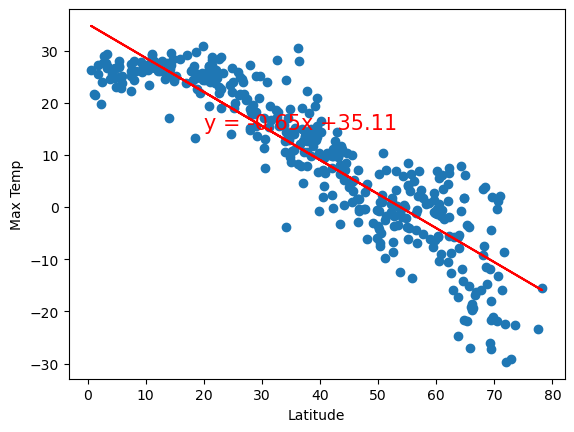

In [35]:
# Linear regression on Northern Hemisphere
lin_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], "Max Temp")

The r-value is: 0.3767605218202385


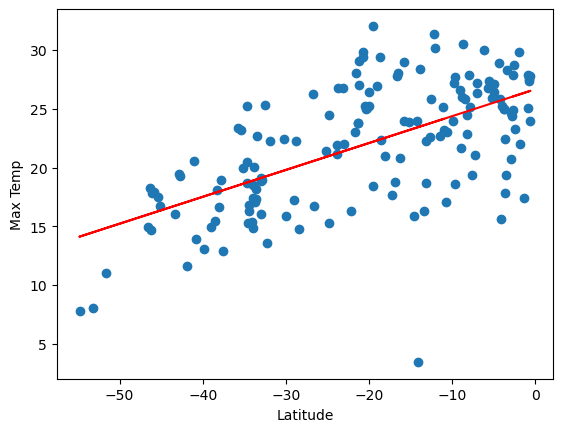

In [36]:
# Linear regression on Southern Hemisphere
lin_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], "Max Temp")

**Discussion about the linear relationship:** There is a stronger linear correlation between Latitude and Max Temp for the Northern Hemisphere as r=0.81 compared to the Southern Hempishere of r=0.38. The Northern Hemisphere would have a strong correlation while the Southern would have a weak correlation. The overall general trend for latitude and max temp for the Northern Hemisphere is a negative correlation as the further you go away from the equator the colder it gets. The overall trend for latitude an max temp for the Southern Hemisphere is a positive correlation as the closer you get to the equator the warmer it gets. There was no negative max temperatures found in Southern Hemisphere, where there was some found in the Northern Hemisphere.
 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11126261638531222


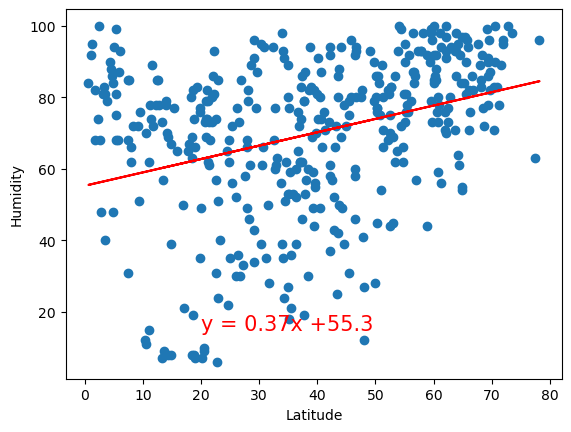

In [37]:
# Northern Hemisphere
lin_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], "Humidity")

The r-value is: 0.18731764112468696


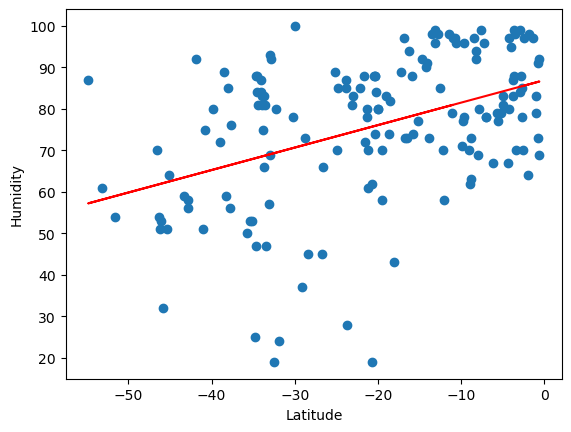

In [38]:
# Southern Hemisphere
lin_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], "Humidity")

**Discussion about the linear relationship:** There is no linear correlation between Latitude and Humidity for the Northern Hemisphere as r=0.11 compared to the Southern Hempishere of r=0.19. Neither hemisphere has a correlation. The overall general trend for latitude and humidity for the Northern Hemisphere is a positive correlation as the further you go away from the equator the more humidity there is. The overall trend for latitude an Humidity for the Southern Hemisphere is a positive correlation as the closer you get to the equator the more Humidity. This contradiction of humidity to the equator shows that the equator is irrelevant and as you go from the South to North the more humidity there is. But with the r-values being so low there is no correlation or conclusions that can be drawn from latitude and humidity from either hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.021354345033213575


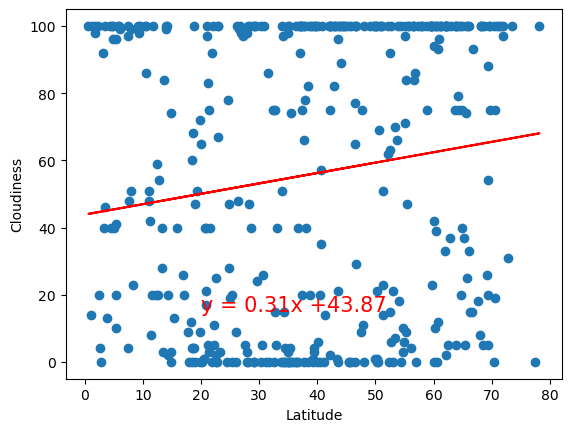

In [39]:
# Northern Hemisphere
lin_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], "Cloudiness")

The r-value is: 0.1486991552540242


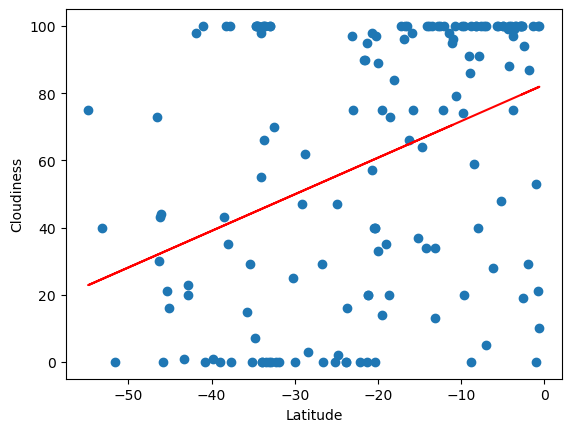

In [40]:
# Southern Hemisphere
lin_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], "Cloudiness")

**Discussion about the linear relationship:** There is no linear correlation between Latitude and cloudiness for the Northern Hemisphere as r=0.02 compared to the Southern Hempishere of r=0.15. Neither hemisphere has a correlation. The overall general trend for latitude and cloudiness for the Northern Hemisphere is a positive correlation as the further you go away from the equator the more cloudiness there is. The overall trend for latitude an cloudiness for the Southern Hemisphere is a positive correlation as the closer you get to the equator the more cloudiness. This contradiction of cloudiness to the equator shows that the equator is irrelevant and as you go from the South to North the more cloudiness there is. But with the r-values being so low there is no correlation or conclusions that can be drawn from latitude and cloudiness from either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004885621841026024


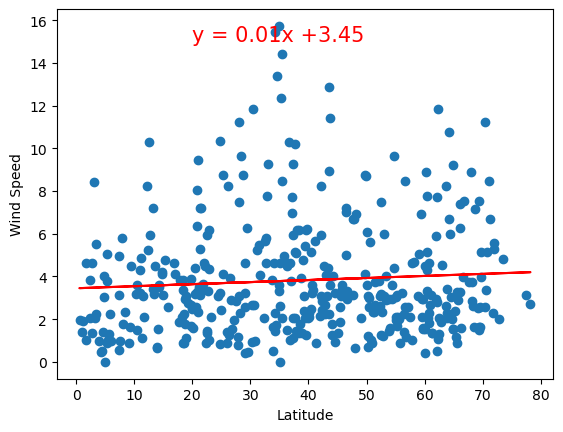

In [41]:
# Northern Hemisphere
lin_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], "Wind Speed")

The r-value is: 0.12486989895554704


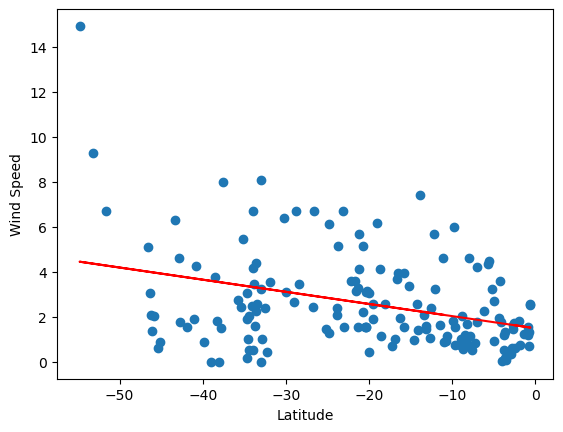

In [43]:
# Southern Hemisphere
lin_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], "Wind Speed")

**Discussion about the linear relationship:** There is no linear correlation between Latitude and windspeed for the Northern Hemisphere as r=0.004 compared to the Southern Hempishere of r=0.12. Neither hemisphere has a correlation. The overall general trend for latitude and wind speed for the Northern Hemisphere is a positive correlation as the further you go away from the equator the more wind speed there is. The overall trend for latitude and wind speed for the Southern Hemisphere is a negative correlation as the closer you get to the equator the less wind speed. But with the r-values being so low there is no correlation or conclusions that can be drawn from latitude and wind speed from either hemisphere.